### Lecture_02_Linear_Model

In [3]:
import torch
print(torch.__version__)

1.7.0


w= 0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.666666666666668
w= 0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE= 16.846666666666668
w= 0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE= 15.120000000000003
w= 0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE= 13.486666666666665
w= 0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE= 11.946666666666667
w= 0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE= 10.5
w= 0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE= 9.146666666666663
w= 0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2.0 4.0 1.4000000000000001 6.75

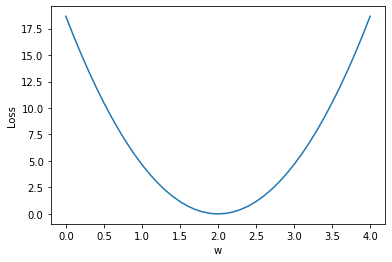

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

# 构造训练数据集
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

def forward(x):
    return x*w

def loss(x, y):
    y_pred = forward(x)
    return (y_pred-y)*(y_pred-y)  # 平方损失

w_list = []  # 记录尝试的权重
mse_list = []  # 记录每个权重对应的平方损失

for w in np.arange(0.0, 4.1, 0.1):  # 初步能够确定w的取值的范围会导致损失函数最小
    print('w=', w)
    l_sum = 0
    for x_val, y_val in zip(x_data, y_data):
        y_pred_val = forward(x_val)
        loss_val = loss(x_val, y_val)
        l_sum += loss_val  # 总的损失加上所有样本点的损失
        print('\t', x_val, y_val, y_pred_val, loss_val)
    print('MSE=', l_sum/3)  # 对于每个w，样本数据计算出来的均方误差
    w_list.append(w)
    mse_list.append(l_sum/3)

plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

- exercise
    - 实现y=k*x+b

- 第一种方法：自己实现

w=0.0,b=0.0
MSE= 27.666666666666668
w=0.2,b=0.0
MSE= 23.320000000000004
w=0.4,b=0.0
MSE= 19.346666666666668
w=0.6000000000000001,b=0.0
MSE= 15.746666666666664
w=0.8,b=0.0
MSE= 12.519999999999998
w=1.0,b=0.0
MSE= 9.666666666666666
w=1.2000000000000002,b=0.0
MSE= 7.186666666666665
w=1.4000000000000001,b=0.0
MSE= 5.079999999999999
w=1.6,b=0.0
MSE= 3.3466666666666653
w=1.8,b=0.0
MSE= 1.9866666666666661
w=2.0,b=0.0
MSE= 1.0
w=2.2,b=0.0
MSE= 0.38666666666666627
w=2.4000000000000004,b=0.0
MSE= 0.14666666666666658
w=2.6,b=0.0
MSE= 0.28000000000000036
w=2.8000000000000003,b=0.0
MSE= 0.7866666666666672
w=3.0,b=0.0
MSE= 1.6666666666666667
w=3.2,b=0.0
MSE= 2.920000000000003
w=3.4000000000000004,b=0.0
MSE= 4.5466666666666695
w=3.6,b=0.0
MSE= 6.5466666666666695
w=3.8000000000000003,b=0.0
MSE= 8.920000000000002
w=0.0,b=0.2
MSE= 25.706666666666663
w=0.2,b=0.2
MSE= 21.52
w=0.4,b=0.2
MSE= 17.706666666666663
w=0.6000000000000001,b=0.2
MSE= 14.266666666666666
w=0.8,b=0.2
MSE= 11.199999999999998
w=1.0,b=0.

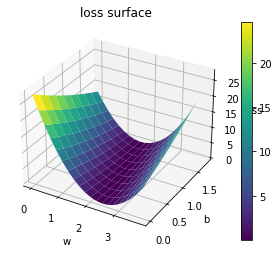

In [7]:
import numpy as np 
import matplotlib.pyplot as plt

# 构造数据集
x_data = [1.0, 2.0, 3.0]
y_data = [3.0, 5.0, 7.0]

def forward(x):  
    return w*x+b

def loss(x, y):
    y_pred = forward(x)
    return (y_pred-y)*(y_pred-y)

w_list = np.arange(0, 4, 0.2)
b_list = np.arange(0, 2, 0.2)
w_list, b_list = np.meshgrid(w_list, b_list)  # 形成矩阵
mse_list = np.zeros_like(w_list)  # 最后的因变量也是矩阵
for i in range(len(w_list)):
    for j in range(len(w_list[0])):
        l_sum = 0
        w, b = w_list[i][j], b_list[i][j]
        print('w={},b={}'.format(w, b))
        for x_val, y_val in zip(x_data, y_data):
            y_pred_val = forward(x_val)
            loss_val = loss(x_val, y_val)
            l_sum += loss_val
        print('MSE=', l_sum/3)  # 对于每个w与b的组合对应的MSE
        mse_list[i][j] = l_sum/3
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(w_list, b_list, mse_list, rstride=1, cstride=1, cmap=plt.cm.viridis)
fig.colorbar(surf)
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')
ax.set_title('loss surface')
plt.show()        

- 第二种方法：[参考网址](https://blog.csdn.net/weixin_44841652/article/details/105017087)

[[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
  3.6 3.8]
 [0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6
  3.8 4. ]
 [0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8
  4.  4.2]
 [0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4.
  4.2 4.4]
 [0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4.  4.2
  4.4 4.6]
 [1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4.  4.2 4.4
  4.6 4.8]
 [1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4.  4.2 4.4 4.6
  4.8 5. ]
 [1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4.  4.2 4.4 4.6 4.8
  5.  5.2]
 [1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4.  4.2 4.4 4.6 4.8 5.
  5.2 5.4]
 [1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4.  4.2 4.4 4.6 4.8 5.  5.2
  5.4 5.6]]
[[0.  0.4 0.8 1.2 1.6 2.  2.4 2.8 3.2 3.6 4.  4.4 4.8 5.2 5.6 6.  6.4 6.8
  7.2 7.6]
 [0.2 0.6 1.  1.4 1.8 2.2 2.6 3.  3.4 3.8 4.2 4.6 5.  5.4 5.8 6.2 

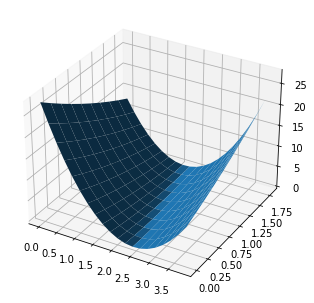

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#这里设函数为y=2x+1
x_data = [1.0,2.0,3.0]
y_data = [3.0,5.0,7.0]

def forward(x):
    return x * w + b

def loss(x,y):
    y_pred = forward(x)
    return (y_pred-y)*(y_pred-y)  # *表示对应位置元素相乘

mse_list = []
W=np.arange(0.0,4,0.2)
B=np.arange(0.0,2,0.2)
[w,b]=np.meshgrid(W,B)

l_sum = 0
for x_val, y_val in zip(x_data, y_data):
    y_pred_val = forward(x_val)
    print(y_pred_val)
    loss_val = loss(x_val, y_val)
    l_sum += loss_val

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(w, b, l_sum/3)
plt.show()


### Lecture_03_Gradient_Descent

- 采用梯度下降更新参数

Predict (before training) 4 4.0
Epoch: 0 w= 1.0933333333333333 loss= 4.666666666666667
Epoch: 1 w= 1.1779555555555554 loss= 3.8362074074074086
Epoch: 2 w= 1.2546797037037036 loss= 3.1535329869958857
Epoch: 3 w= 1.3242429313580246 loss= 2.592344272332262
Epoch: 4 w= 1.3873135910979424 loss= 2.1310222071581117
Epoch: 5 w= 1.4444976559288012 loss= 1.7517949663820642
Epoch: 6 w= 1.4963445413754464 loss= 1.440053319920117
Epoch: 7 w= 1.5433523841804047 loss= 1.1837878313441108
Epoch: 8 w= 1.5859728283235668 loss= 0.9731262101573632
Epoch: 9 w= 1.6246153643467005 loss= 0.7999529948031382
Epoch: 10 w= 1.659651263674342 loss= 0.6575969151946154
Epoch: 11 w= 1.6914171457314033 loss= 0.5405738908195378
Epoch: 12 w= 1.7202182121298057 loss= 0.44437576375991855
Epoch: 13 w= 1.7463311789976905 loss= 0.365296627844598
Epoch: 14 w= 1.7700069356245727 loss= 0.3002900634939416
Epoch: 15 w= 1.7914729549662791 loss= 0.2468517784170642
Epoch: 16 w= 1.8109354791694263 loss= 0.2029231330489788
Epoch: 17 w= 

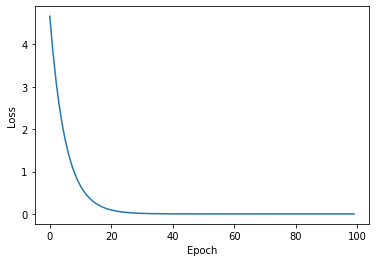

In [7]:
import matplotlib.pyplot as plt
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = 1.0  # 随机初始化

def forward(x):
    return x*w 

def cost(xs, ys):
    cost = 0
    for x, y in zip(xs, ys):
        y_pred = forward(x)
        cost += (y_pred - y) ** 2
    return cost / len(xs)  # MSE

def gradient(xs, ys):
    grad = 0
    for x, y in zip(xs, ys):
        grad += 2*x*(x*w-y)
    return grad / len(xs)

print('Predict (before training)', 4, forward(4))
cost_list = []
for epoch in range(100):  # 训练100个epoch
    cost_val = cost(x_data, y_data)  # 参数更新之前计算损失函数
    cost_list.append(cost_val)
    grad_val = gradient(x_data, y_data)
    w -= 0.01*grad_val  # 学习率设置为0.01
    print('Epoch:', epoch, 'w=', w, 'loss=', cost_val)
print('Predict (after training)', 4, forward(4))
plt.plot(cost_list)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

- 采用随机梯度下降更新参数

Predict (before training) 4 4.0
	grad: 1.0 2.0 -2.0
	grad: 2.0 4.0 -7.84
	grad: 3.0 6.0 -16.2288
progress: 0 w= 1.260688 loss= 9.131170340095998
	grad: 1.0 2.0 -1.478624
	grad: 2.0 4.0 -5.796206079999999
	grad: 3.0 6.0 -11.998146585599997
progress: 1 w= 1.453417766656 loss= 4.990935477534164
	grad: 1.0 2.0 -1.093164466688
	grad: 2.0 4.0 -4.285204709416961
	grad: 3.0 6.0 -8.87037374849311
progress: 2 w= 1.5959051959019805 loss= 2.727956659786429
	grad: 1.0 2.0 -0.8081896081960389
	grad: 2.0 4.0 -3.1681032641284723
	grad: 3.0 6.0 -6.557973756745939
progress: 3 w= 1.701247862192685 loss= 1.4910526435717042
	grad: 1.0 2.0 -0.59750427561463
	grad: 2.0 4.0 -2.3422167604093502
	grad: 3.0 6.0 -4.848388694047353
progress: 4 w= 1.7791289594933983 loss= 0.814982883956898
	grad: 1.0 2.0 -0.44174208101320334
	grad: 2.0 4.0 -1.7316289575717576
	grad: 3.0 6.0 -3.584471942173538
progress: 5 w= 1.836707389300983 loss= 0.4454551648502959
	grad: 1.0 2.0 -0.3265852213980338
	grad: 2.0 4.0 -1.2802140678802

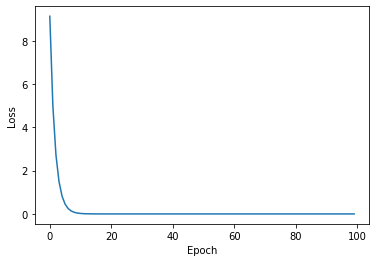

In [8]:
import matplotlib.pyplot as plt

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

def forward(x):  # 前向传播函数
    return x*w 

def loss(x, y):  # 随机梯度下降每次只选择一个训练样本
    y_pred = forward(x)
    return (y_pred-y)**2

def gradient(x, y):
    return 2*x*(x*w-y)

w = 1.0  # 随机初始化参数
cost_list = []
print('Predict (before training)', 4, forward(4))

for epoch in range(100):
    cost = 0
    for x, y in zip(x_data, y_data):  # 一个训练样本为一个batch
        grad = gradient(x, y)
        w -= 0.01*grad
        print('\tgrad:', x, y, grad)
        cost += loss(x, y)
    cost_list.append(cost)
    print('progress:', epoch, 'w=', w, 'loss=', cost)
print('Predict (after training)', 4, forward(4))
plt.plot(cost_list)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
        
        
        


### Lecture_04_Back_Propogation

predict (before training) 4 4.0
	grad: 1.0 2.0 -2.0
	grad: 2.0 4.0 -7.840000152587891
	grad: 3.0 6.0 -16.228801727294922
progress: 0 7.315943717956543
	grad: 1.0 2.0 -1.478623867034912
	grad: 2.0 4.0 -5.796205520629883
	grad: 3.0 6.0 -11.998146057128906
progress: 1 3.9987640380859375
	grad: 1.0 2.0 -1.0931644439697266
	grad: 2.0 4.0 -4.285204887390137
	grad: 3.0 6.0 -8.870372772216797
progress: 2 2.1856532096862793
	grad: 1.0 2.0 -0.8081896305084229
	grad: 2.0 4.0 -3.1681032180786133
	grad: 3.0 6.0 -6.557973861694336
progress: 3 1.1946394443511963
	grad: 1.0 2.0 -0.5975041389465332
	grad: 2.0 4.0 -2.3422164916992188
	grad: 3.0 6.0 -4.848389625549316
progress: 4 0.6529689431190491
	grad: 1.0 2.0 -0.4417421817779541
	grad: 2.0 4.0 -1.7316293716430664
	grad: 3.0 6.0 -3.58447265625
progress: 5 0.35690122842788696
	grad: 1.0 2.0 -0.3265852928161621
	grad: 2.0 4.0 -1.2802143096923828
	grad: 3.0 6.0 -2.650045394897461
progress: 6 0.195076122879982
	grad: 1.0 2.0 -0.24144840240478516
	grad: 2.

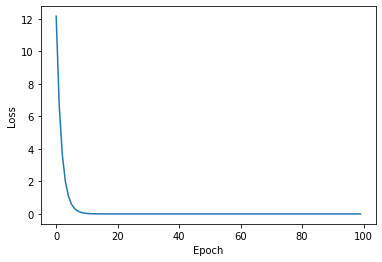

In [3]:
import torch
import matplotlib.pyplot as plt
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = torch.Tensor([1.0])
w.requires_grad = True

def forward(x):
    return x*w

def loss(x, y):  # 构建计算图
    y_pred = forward(x)
    return (y_pred-y)**2

print('predict (before training)', 4, forward(4).item())  # .item()是将只有一个元素的tensor转换为标量，防止构建新的计算图
cost_list = []
for epoch in range(100):
    cost = 0
    for x, y in zip(x_data, y_data):
        l = loss(x, y)  # 前向传播，构建计算图，计算每个阶段的梯度
        cost += l.item()
        l.backward()  # 反向传播，计算loss函数对每个tensor的梯度
        print('\tgrad:', x, y, w.grad.item())
        w.data = w.data - 0.01*w.grad.data
        w.grad.data.zero_()  # 梯度清零
    print('progress:', epoch, l.item())
    cost_list.append(cost)
print('predict (after training)', 4, forward(4).item())
plt.plot(cost_list)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


### Lecture_05_Linear_Regression_with_Pytorch
1. Prepare dataset
2. Design model using Class
    - inherit from nn.Module
3. Contruct loss and optimizer
    - using Pytorch API
4. Training cycle
    - forward, backward, update

In [4]:
import torch 

# torch中训练都是采用的mini-batch的形式，所以x_data和y_data都是批量的数据样本和数据样本所对应的标签
x_data = torch.Tensor([[1.0], [2.0], [3.0]])
y_data = torch.Tensor([[2.0], [4.0], [6.0]])

class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
    
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

model = LinearModel()
criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# training cycle
for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
# output weight and bias
print('w=', model.linear.weight.item())
print('b=', model.linear.bias.item())

# Test Model
x_test = torch.Tensor([[4.0]])
y_test = model(x_test)
print('y_pred=', y_test.item())

/opt/conda/envs/pytorch/lib/python3.6/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


0 27.322418212890625
1 12.167768478393555
2 5.421281814575195
3 2.417874813079834
4 1.0807783603668213
5 0.4854779839515686
6 0.22040456533432007
7 0.10234016180038452
8 0.04972021281719208
9 0.026235705241560936
10 0.015722069889307022
11 0.010983538813889027
12 0.008816840127110481
13 0.007795875426381826
14 0.007285709492862225
15 0.007003778591752052
16 0.00682419678196311
17 0.006691022776067257
18 0.006579240784049034
19 0.006477737333625555
20 0.0063814870081841946
21 0.006288429722189903
22 0.006197432056069374
23 0.006108101457357407
24 0.006020155269652605
25 0.005933643784373999
26 0.005848324857652187
27 0.005764260422438383
28 0.005681401118636131
29 0.005599768832325935
30 0.005519308149814606
31 0.0054399557411670685
32 0.005361785646528006
33 0.005284714046865702
34 0.0052087814547121525
35 0.005133919417858124
36 0.005060143303126097
37 0.00498742051422596
38 0.0049157701432704926
39 0.004845104180276394
40 0.0047754812985658646
41 0.004706833977252245
42 0.00463921763

- exercise
    - Try different optimizer in linear regression

epoch= 0 loss= 46.67709732055664
epoch= 1 loss= 42.534996032714844
epoch= 2 loss= 38.59195327758789
epoch= 3 loss= 34.851139068603516
epoch= 4 loss= 31.31512451171875
epoch= 5 loss= 27.985877990722656
epoch= 6 loss= 24.864675521850586
epoch= 7 loss= 21.952035903930664
epoch= 8 loss= 19.24767303466797
epoch= 9 loss= 16.750417709350586
epoch= 10 loss= 14.458176612854004
epoch= 11 loss= 12.367890357971191
epoch= 12 loss= 10.475485801696777
epoch= 13 loss= 8.775863647460938
epoch= 14 loss= 7.262878894805908
epoch= 15 loss= 5.929358959197998
epoch= 16 loss= 4.767119884490967
epoch= 17 loss= 3.767026901245117
epoch= 18 loss= 2.9190616607666016
epoch= 19 loss= 2.212418556213379
epoch= 20 loss= 1.6356292963027954
epoch= 21 loss= 1.176705002784729
epoch= 22 loss= 0.8233003616333008
epoch= 23 loss= 0.562894880771637
epoch= 24 loss= 0.38298091292381287
epoch= 25 loss= 0.27126389741897583
epoch= 26 loss= 0.21585078537464142
epoch= 27 loss= 0.2054356187582016
epoch= 28 loss= 0.22946542501449585
epo

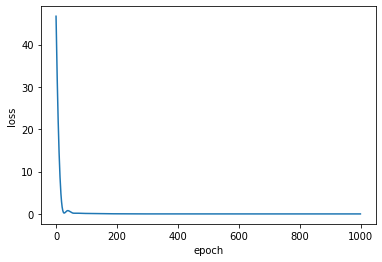

In [9]:
# prepare dataset 
import torch
import matplotlib.pyplot as plt

x_data = torch.Tensor([[1.0], [2.0], [3.0]])
y_data = torch.Tensor([[2.0], [4.0], [6.0]])

# define model using class
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
    
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

model = LinearModel()
# define loss function and optimizer
loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
# training cycle
cost_list = []
for epoch in range(1000):
    y_pred = model(x_data)
    cost = loss(y_pred, y_data)
    cost_list.append(cost.item())
    print('epoch=', epoch, 'loss=', cost.item())
    optimizer.zero_grad()  # 梯度初始化
    cost.backward()
    optimizer.step()
print('w=', model.linear.weight.item())
print('b=', model.linear.bias.item())

x_test = torch.Tensor([[4.0]])
y_test = model(x_test)
print('prediction=', y_test.item())

plt.plot(cost_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

    

### Lecture_06_Logistic_Regression

/opt/conda/envs/pytorch/lib/python3.6/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/opt/conda/envs/pytorch/lib/python3.6/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch= 0 loss= 2.9917542934417725
epoch= 1 loss= 2.2760088443756104
epoch= 2 loss= 2.043332815170288
epoch= 3 loss= 1.9191837310791016
epoch= 4 loss= 1.8111979961395264
epoch= 5 loss= 1.7167229652404785
epoch= 6 loss= 1.6389877796173096
epoch= 7 loss= 1.5586357116699219
epoch= 8 loss= 1.495798110961914
epoch= 9 loss= 1.4268018007278442
epoch= 10 loss= 1.37360680103302
epoch= 11 loss= 1.3154716491699219
epoch= 12 loss= 1.269834041595459
epoch= 13 loss= 1.2220102548599243
epoch= 14 loss= 1.1830617189407349
epoch= 15 loss= 1.1443384885787964
epoch= 16 loss= 1.111445665359497
epoch= 17 loss= 1.0800671577453613
epoch= 18 loss= 1.052361249923706
epoch= 19 loss= 1.026440143585205
epoch= 20 loss= 1.0028281211853027
epoch= 21 loss= 0.9807497262954712
epoch= 22 loss= 0.9601854085922241
epoch= 23 loss= 0.9408073425292969
epoch= 24 loss= 0.9225031137466431
epoch= 25 loss= 0.9051195383071899
epoch= 26 loss= 0.8885674476623535
epoch= 27 loss= 0.8727642893791199
epoch= 28 loss= 0.8576487302780151
epo

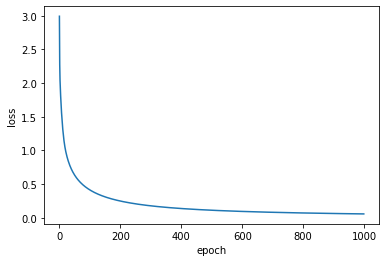

In [12]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# prepare dataset
x_data = torch.Tensor([[1.0], [2.0], [3.0]])
y_data = torch.Tensor([[0], [0], [1]])

# define model using class
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
        
    def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred

model = LogisticRegressionModel()

# define loss function and optimizer
criterion = torch.nn.BCELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

# training cycle
loss_list = []
for epoch in range(1000):
    # forward
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    loss_list.append(loss.item())
    print('epoch=', epoch, 'loss=', loss.item())
    # backward
    optimizer.zero_grad()
    loss.backward()
    # update
    optimizer.step()
print('w=', model.linear.weight.item())
print('b=', model.linear.bias.item())
plt.plot(loss_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
    
    



- result of logistic regression

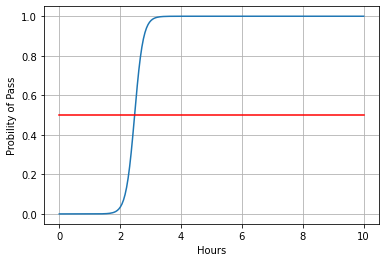

In [13]:
import numpy as np 
import matplotlib.pyplot as plt 

x = np.linspace(0, 10, 200)
x_t = torch.Tensor(x).view(200, 1)
y_t = model(x_t)
y = y_t.data.numpy()
plt.plot(x, y)
plt.plot([0, 10], [0.5, 0.5], c='r')
plt.xlabel('Hours')
plt.ylabel('Probility of Pass')
plt.grid()
plt.show()

- torch.nn.BCEloss函数的计算原理

In [1]:
# 官网实例
import torch
m = torch.nn.Sigmoid()
loss = torch.nn.BCELoss()
input = torch.randn(3, requires_grad=True)
target = torch.empty(3).random_(2)
output = loss(m(input), target)
# output.backward()
output.item()

0.9190952181816101

In [2]:
# 预测的概率
m(input)

tensor([0.5249, 0.4911, 0.2720], grad_fn=<SigmoidBackward>)

In [4]:
two = m(input).tolist()
two

[0.5248640775680542, 0.49114295840263367, 0.27195703983306885]

In [11]:
# 实际计算公式
import numpy as np
(np.log(1-two[0])+np.log(two[1])+np.log(two[2]))/3

-0.9190951887554627

### Lecture_07_Multiple_Dimension_Input

- pandas中的read_csv不自动将第一行作为表头，自己设置表头

In [16]:
import pandas as pd

diabetes = pd.read_csv('./diabetes.csv', header=None, prefix='feature')
diabetes

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
...,...,...,...,...,...,...,...,...,...
754,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.400000,1
755,-0.764706,0.226131,0.147541,-0.454545,0.000000,0.096870,-0.776260,-0.800000,1
756,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.700000,1
757,-0.882353,0.266332,-0.016393,0.000000,0.000000,-0.102832,-0.768574,-0.133333,0


epoch= 0 loss= 0.6898143291473389
epoch= 1 loss= 0.672759473323822
epoch= 2 loss= 0.6623375415802002
epoch= 3 loss= 0.655929684638977
epoch= 4 loss= 0.6519653797149658
epoch= 5 loss= 0.6494987607002258
epoch= 6 loss= 0.647956371307373
epoch= 7 loss= 0.6469876170158386
epoch= 8 loss= 0.6463767290115356
epoch= 9 loss= 0.6459903717041016
epoch= 10 loss= 0.6457450985908508
epoch= 11 loss= 0.6455888748168945
epoch= 12 loss= 0.6454890370368958
epoch= 13 loss= 0.6454249024391174
epoch= 14 loss= 0.6453834772109985
epoch= 15 loss= 0.6453564167022705
epoch= 16 loss= 0.6453385353088379
epoch= 17 loss= 0.6453264951705933
epoch= 18 loss= 0.6453182101249695
epoch= 19 loss= 0.6453123092651367
epoch= 20 loss= 0.6453078389167786
epoch= 21 loss= 0.6453043818473816
epoch= 22 loss= 0.6453015208244324
epoch= 23 loss= 0.6452990770339966
epoch= 24 loss= 0.6452968716621399
epoch= 25 loss= 0.6452948451042175
epoch= 26 loss= 0.6452928781509399
epoch= 27 loss= 0.6452910304069519
epoch= 28 loss= 0.645289242267608

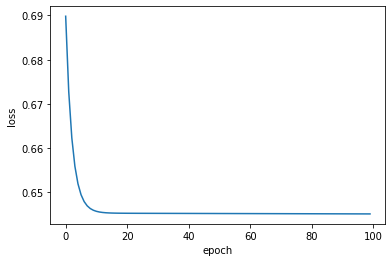

In [26]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# 1. prepare dataset
xy = np.loadtxt('./diabetes.csv', delimiter=',', dtype=np.float32)
x_data = torch.from_numpy(xy[:, :-1])
y_data = torch.from_numpy(xy[:, -1]).view(-1, 1)

# 2. define model using class
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x
  
model = Model()

# 3. define loss function and optimizer
criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

# 4. training cycle
cost_list = []
for epoch in range(100):
    # forward
    y_pred = model(x_data)  # 这里的batch即为所有数据
    loss = criterion(y_pred, y_data)
    cost_list.append(loss.item())
    print('epoch=', epoch, 'loss=', loss.item())
    # backward
    optimizer.zero_grad()
    loss.backward()
    # update
    optimizer.step()

plt.plot(cost_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()



In [19]:
xy.shape

(759, 9)

In [20]:
x_data.shape

torch.Size([759, 8])

In [25]:
y_data.shape

torch.Size([759, 1])

- exercise
    - try some other activation functions
- 尝试很多不同的激活函数后的总结
    - 针对二分类任务，因为最后输出的需要是一个概率（即取值必须在0到1之间），所以激活函数的因变量的取值不在0到1之间的激活函数是不适用于这种二分类任务的，例如torch.nn.Tanh和torch.nn.LeakyReLU以及torch.nn.ReLU
    - 针对torch.nn.ReLU激活函数，因为当自变量小于0时的梯度为0，所以很可能会出现在多个训练epoch中因为梯度取值为零导致的参数无法更新，损失保持不变的情况
    - 经过分析，针对类似这样的二分类任务，其中最合适的激活函数是torch.nn.Sigmoid函数

In [43]:
# 1. prepare dataset
import numpy as np
import torch
import matplotlib.pyplot as plt

xy_data = np.loadtxt('./diabetes.csv', delimiter=',', dtype=np.float32)
x_data = torch.from_numpy(xy_data[:, :-1])
y_data = torch.from_numpy(xy_data[:, -1]).view(-1, 1)

# 2. define model using class
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.activition = torch.nn.LeakyReLU()
    
    def forward(self, x):
        x = self.activition(self.linear1(x))
        x = self.activition(self.linear2(x))
        x = self.activition(self.linear3(x))
        return x

model = Model()

# 3. define loss function and optimizer
criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

# 4. training cycle
cost_list = []
for epoch in range(100):
    # forward
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    cost_list.append(loss.item())
    print('epoch=', epoch, 'loss=', loss.item())
    # backward
    optimizer.zero_grad()
    loss.backward()
    # update
    optimizer.step()

plt.plot(cost_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
    
    

epoch= 0 loss= 0.9253013134002686


/opt/conda/envs/pytorch/lib/python3.6/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


RuntimeError: all elements of input should be between 0 and 1

### Lecture_08_Dataset_and_Dataloader

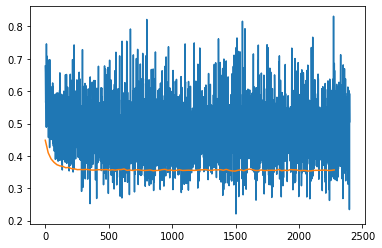

In [58]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# 1. prepare dataset
class DiabetesDataset(Dataset):
    def __init__(self, filepath):
        xy = np.loadtxt(filepath, delimiter=',', dtype=np.float32)
        self.len = xy.shape[0]
        self.x_data = torch.from_numpy(xy[:, :-1])
        self.y_data = torch.from_numpy(xy[:, [-1]])
    
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
    
    def __len__(self):
        return self.len

# 2. define model using class
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(8, 1)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, x):
        x = self.sigmoid(self.linear(x))
        return x
    # forward函数如果这样定义的话会报错
    # def forward(self, x):
    #     x = torch.nn.Sigmoid(self.linear(x))
    #     return x


if __name__ == '__main__':
    
    dataset = DiabetesDataset('./diabetes.csv')
    train_loader = DataLoader(dataset=dataset, batch_size=32, shuffle=True, num_workers=2)
    
    model = Model()
    
    # 3. define the loss function and optimizer
    criterion = torch.nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.5)
    
    # 4. training cycle
    # 需要有每个batch的loss变化图和每个epoch的loss变化图
    batch_loss_list = []
    epoch_loss_list = []

    
    for epoch in range(100):
        epoch_loss = 0
        for i, data in enumerate(train_loader, 0):
            # i表示第几个batch，data表示当前这个batch的所有数据
            # 1. prepare data
            input, labels = data
            # 2. forward
            y_pred = model(input)
            loss = criterion(y_pred, labels)
            batch_loss_list.append(loss.item())
            epoch_loss += loss.item()
            # 3. backward
            optimizer.zero_grad()
            loss.backward()
            # 4. update
            optimizer.step()
        epoch_loss_list.append(epoch_loss/32)
    plt.plot(list(range(len(batch_loss_list))), batch_loss_list)
    plt.plot(list(range(0, len(dataset)//32*100, len(dataset)//32)), epoch_loss_list)
    plt.show()
            
            
            
            
            


        

- exercise
    - build dataloader for Titanic dataset
    - build a classifier using dataloader

In [1]:
import pandas as pd 
train = pd.read_csv('./titanic/train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
import pandas as pd 
test = pd.read_csv('./titanic/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [13]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

- 将训练数据与测试数据结合后进行特征工程

In [19]:
train_test = train.append(test, ignore_index=True)
train_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


- 筛选有效列（特征）

In [20]:
train_test_new = train_test.drop(columns=['Name', 'Ticket', 'Cabin'])
train_test_new.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Fare             1
Embarked         2
dtype: int64

- 对缺失值进行插值

In [21]:
# Age采用均值填充
train_test_new['Age'] = train_test_new['Age'].fillna(train_test_new['Age'].mean())
# Fare采用均值填充
train_test_new['Fare'] = train_test_new['Fare'].fillna(train_test_new['Fare'].mean())
# Embarked采用众数填充
train_test_new['Embarked'] = train_test_new['Embarked'].fillna(train_test_new['Embarked'].mode()[0])
train_test_new.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

- 对类别型变量离散化

In [22]:
train_test_new

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.000000,1,0,7.2500,S
1,2,1.0,1,female,38.000000,1,0,71.2833,C
2,3,1.0,3,female,26.000000,0,0,7.9250,S
3,4,1.0,1,female,35.000000,1,0,53.1000,S
4,5,0.0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,male,29.881138,0,0,8.0500,S
1305,1306,NaN,1,female,39.000000,0,0,108.9000,C
1306,1307,NaN,3,male,38.500000,0,0,7.2500,S
1307,1308,NaN,3,male,29.881138,0,0,8.0500,S


In [85]:
train_test_new_lisanhua = pd.get_dummies(train_test_new)
train, test = train_test_new_lisanhua[0: len(train)], train_test_new_lisanhua[len(train):]
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,2,1.0,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,1.0,3,26.000000,0,0,7.9250,1,0,0,0,1
3,4,1.0,1,35.000000,1,0,53.1000,1,0,0,0,1
4,5,0.0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,888,1.0,1,19.000000,0,0,30.0000,1,0,0,0,1
888,889,0.0,3,29.881138,1,2,23.4500,1,0,0,0,1
889,890,1.0,1,26.000000,0,0,30.0000,0,1,1,0,0


In [86]:
test

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,NaN,3,34.500000,0,0,7.8292,0,1,0,1,0
1,893,NaN,3,47.000000,1,0,7.0000,1,0,0,0,1
2,894,NaN,2,62.000000,0,0,9.6875,0,1,0,1,0
3,895,NaN,3,27.000000,0,0,8.6625,0,1,0,0,1
4,896,NaN,3,22.000000,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,29.881138,0,0,8.0500,0,1,0,0,1
414,1306,NaN,1,39.000000,0,0,108.9000,1,0,1,0,0
415,1307,NaN,3,38.500000,0,0,7.2500,0,1,0,0,1
416,1308,NaN,3,29.881138,0,0,8.0500,0,1,0,0,1


- 构建train的dataset类和test的dataset类

In [94]:
from torch.utils.data import Dataset, DataLoader

class train_dataset(Dataset):
    def __init__(self, train_data_after_feature_engineering):
        # 传入的是经过特征工程的dataframe格式的特征数据
        self.train_data = np.array(train_data_after_feature_engineering.values[:, 1:], dtype=np.float32)  # 去掉PassengerId列
        self.len = len(self.train_data)
    
    # 返回指定索引的数据
    def __getitem__(self, index):
        data, labels = self.train_data[:, 1:], self.train_data[:, [0]]
        return data[index], labels[index]
    
    # 返回数据集的长度
    def __len__(self):
        return self.len
    
class test_dataset(Dataset):
    def __init__(self, test_data_after_feature_engineering):
        self.test_data = np.array(test_data_after_feature_engineering.values[:, 2:], dtype=np.float32)
        self.len = len(self.test_data)
    
    def __getitem__(self, index):
        return self.test_data[index]
    
    def __len__(self):
        return self.len

- 构建train和test的dataloader

In [95]:
# 初始化Dataset
train_data = train_dataset(train)
test_data = test_dataset(test)

# 构建dataloader
train_dataloader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=32, shuffle=False)

- 构建分类网络进行训练

epoch= 0 loss= 0.6842992625066212
epoch= 1 loss= 0.6708889326878956
epoch= 2 loss= 0.6683619128806251
epoch= 3 loss= 0.6673982398850578
epoch= 4 loss= 0.6671712909426007
epoch= 5 loss= 0.6667860448360443
epoch= 6 loss= 0.6670938772814614
epoch= 7 loss= 0.6669511986630303
epoch= 8 loss= 0.6665401096854892
epoch= 9 loss= 0.6661691516637802
epoch= 10 loss= 0.6664657273462841
epoch= 11 loss= 0.6664705595799855
epoch= 12 loss= 0.6656744203397206
epoch= 13 loss= 0.6659317825521741
epoch= 14 loss= 0.6661501143659864
epoch= 15 loss= 0.6653504073619843
epoch= 16 loss= 0.6654272249766758
epoch= 17 loss= 0.6656271048954555
epoch= 18 loss= 0.6653796562126705
epoch= 19 loss= 0.6653713009187153
epoch= 20 loss= 0.6654224097728729
epoch= 21 loss= 0.6650770349161965
epoch= 22 loss= 0.665263084428651
epoch= 23 loss= 0.6644902761493411
epoch= 24 loss= 0.6645529738494328
epoch= 25 loss= 0.6649933946984155
epoch= 26 loss= 0.6647364114012037
epoch= 27 loss= 0.6644185568605151
epoch= 28 loss= 0.6640336705105

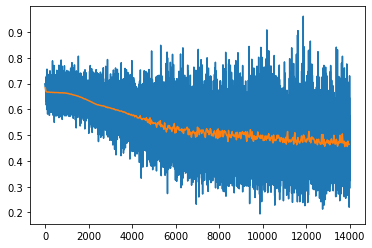

In [89]:
# define model using class
import torch
import matplotlib.pyplot as plt

class TitanicModel(torch.nn.Module):
    def __init__(self):
        super(TitanicModel, self).__init__()
        self.linear1 = torch.nn.Linear(10, 8)
        self.linear2 = torch.nn.Linear(8, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x

model = TitanicModel()

# define loss functions and optimizer
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

# training cycle
epoch_loss_list = []
batch_loss_list = []
for epoch in range(500):
    epoch_loss = 0
    for i, data in enumerate(train_dataloader):
        input, labels = data  # 获得数据和标签
        # forward
        y_pred = model(input)
        loss = criterion(y_pred, labels)
        epoch_loss += loss.item()
        batch_loss_list.append(loss.item())
        # backward
        optimizer.zero_grad()
        loss.backward()
        # update
        optimizer.step()
    epoch_loss_list.append(epoch_loss/len(train_dataloader))
    print('epoch=', epoch, 'loss=', epoch_loss/len(train_dataloader))
plt.plot(list(range(len(batch_loss_list))), batch_loss_list)
plt.plot(list(range(0, len(epoch_loss_list)*len(train_dataloader), len(train_dataloader))), epoch_loss_list)
plt.show()
    

- 对测试集数据进行测试

In [81]:
gender_submission = pd.read_csv('./titanic/gender_submission.csv')
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [93]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,2,1.0,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,1.0,3,26.000000,0,0,7.9250,1,0,0,0,1
3,4,1.0,1,35.000000,1,0,53.1000,1,0,0,0,1
4,5,0.0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,888,1.0,1,19.000000,0,0,30.0000,1,0,0,0,1
888,889,0.0,3,29.881138,1,2,23.4500,1,0,0,0,1
889,890,1.0,1,26.000000,0,0,30.0000,0,1,1,0,0


In [92]:
test

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,NaN,3,34.500000,0,0,7.8292,0,1,0,1,0
1,893,NaN,3,47.000000,1,0,7.0000,1,0,0,0,1
2,894,NaN,2,62.000000,0,0,9.6875,0,1,0,1,0
3,895,NaN,3,27.000000,0,0,8.6625,0,1,0,0,1
4,896,NaN,3,22.000000,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,29.881138,0,0,8.0500,0,1,0,0,1
414,1306,NaN,1,39.000000,0,0,108.9000,1,0,1,0,0
415,1307,NaN,3,38.500000,0,0,7.2500,0,1,0,0,1
416,1308,NaN,3,29.881138,0,0,8.0500,0,1,0,0,1


In [106]:
# 停止构建计算图
final_result = []
with torch.no_grad():
    for i, data in enumerate(test_dataloader):
        input = data
        y_pred = model(input)
        final_result.extend(list(map(lambda x: 1 if x>0.5 else 0, y_pred.view(-1).tolist())))
final_file = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': final_result})
final_file.to_csv('Titanic_predict_result.csv', index=False, encoding='utf-8')
final_file

        

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [114]:
final_file['Survived'].value_counts()

1    213
0    205
Name: Survived, dtype: int64

### Lecture_09_Softmax_Classifier

In [115]:
import torch
y = torch.LongTensor([0])
z = torch.Tensor([[0.2, 0.1, -0.1]])
criterion = torch.nn.CrossEntropyLoss()
loss = criterion(z, y)
print(loss)

tensor(0.9729)


In [118]:
import torch
criterion = torch.nn.CrossEntropyLoss()
Y = torch.LongTensor([2, 0, 1])
Y_pred1 = torch.Tensor([[0.1, 0.2, 0.9], 
                        [1.1, 0.1, 0.2], 
                        [0.2, 2.1, 0.1]])
Y_pred2 = torch.Tensor([[0.8, 0.2, 0.3], 
                        [0.2, 0.3, 0.5], 
                        [0.2, 0.2, 0.5]])
l1 = criterion(Y_pred1, Y)
l2 = criterion(Y_pred2, Y)
print('Batch Loss1=', l1.item(), '\nBatch Loss2=', l2.item())

Batch Loss1= 0.4966353178024292 
Batch Loss2= 1.2388995885849


In [ ]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F 
import torch.optim as optim 

batch_size = 64
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.1307, ), (0.3081, ))  # MINIST数据集的均值和方差
])

train_dataset = datasets.MNIST(root='./', 
                               train=True, 
                               download=True, 
                               transform=transform)

train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=batch_size, 
                          shuffle=True)

test_dataset = datasets.MNIST(root='./', 
                              train=False, 
                              transform=transform)

test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=batch_size, 
                         shuffle=False)

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.l1 = torch.nn.Linear(784, 512)
        self.l2 = torch.nn.Linear(512, 256)
        self.l3 = torch.nn.Linear(256, 128)
        self.l4 = torch.nn.Linear(128, 64)
        self.l5 = torch.nn.Linear(64, 10)
        
    def forward(self, x):
        x = x.view(-1, 784)  # 一张图片即为一个行向量即一个样本
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        return self.l5(x)

model = Net()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0):
        inputs, target = data
        optimizer.zero_grad()
        # forward+backward+update
        outputs = model(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if batch_idx%300 == 299:
            print('[%d, %5d] loss: %.3f'%(epoch+1, batch_idx+1, running_loss/300))
            running_loss = 0.0
            
def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, dim=1)  # torch.max函数的dim=0时表示每一列的最大值，dim=1时表示每一行的最大值
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('Accuracy on test set: %d %%'%(100*correct/total))
    
if __name__ == '__main__':
    for epoch in range(10):
        train(epoch)
        test()

### Lecture_10_Basic_CNN

- 输入、输出和卷积核的尺寸之间的关系

In [2]:
import torch

in_channels, out_channels = 5, 10
width, height = 100, 100
kernel_size = 3
batch_size = 1

input = torch.randn(batch_size, 
                    in_channels, 
                    width, 
                    height)

# 输入的通道，输出的通道，卷积核的尺寸
conv_layer = torch.nn.Conv2d(in_channels, 
                             out_channels, 
                             kernel_size=kernel_size)

output = conv_layer(input)
print(input.shape)
print(output.shape)
print(conv_layer.weight.shape)


torch.Size([1, 5, 100, 100])
torch.Size([1, 10, 98, 98])
torch.Size([10, 5, 3, 3])


- 引入padding这个参数

In [3]:
import torch

input = [3, 4, 6, 5, 7, 
         2, 4, 6, 8, 2, 
         1, 6, 7, 8, 4, 
         9, 7, 4, 6, 2, 
         3, 7, 5, 4, 1]
input = torch.Tensor(input).view(1, 1, 5, 5)
conv_layer = torch.nn.Conv2d(1, 1, kernel_size=3, padding=1, bias=False)
kernel = torch.Tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]).view(1, 1, 3, 3)
conv_layer.weight.data = kernel.data

output = conv_layer(input)
print(output)


tensor([[[[ 91., 168., 224., 215., 127.],
          [114., 211., 295., 262., 149.],
          [192., 259., 282., 214., 122.],
          [194., 251., 253., 169.,  86.],
          [ 96., 112., 110.,  68.,  31.]]]], grad_fn=<ThnnConv2DBackward>)


- 引入stride这个参数

In [6]:
import torch

input = [3, 4, 6, 5, 7, 
         2, 4, 6, 8, 2, 
         1, 6, 7, 8, 4, 
         9, 7, 4, 6, 2, 
         3, 7, 5, 4, 1]

input = torch.Tensor(input).view(1, 1, 5, 5)  # batch_size, in_channel, width, height
conv_layer = torch.nn.Conv2d(1, 1, kernel_size=3, stride=2, bias=False)
kernel = torch.Tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]).view(1, 1, 3, 3)
conv_layer.weight.data = kernel.data
output = conv_layer(input)
print(output)

tensor([[[[211., 262.],
          [251., 169.]]]], grad_fn=<ThnnConv2DBackward>)


- 引入max_pooling，最大池化

In [7]:
import torch

input = [3, 4, 6, 5, 
         2, 4, 6, 8, 
         1, 6, 7, 8, 
         9, 7, 4, 6]
input = torch.Tensor(input).view(1, 1, 4, 4)
maxpooling_layer = torch.nn.MaxPool2d(kernel_size=2)
output = maxpooling_layer(input)
print(output)

tensor([[[[4., 8.],
          [9., 8.]]]])


- 构建一个简单的CNN网络，并将网络放在GPU上运行

In [ ]:
import torch
import torch.nn.functional as F

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = torch.nn.Conv2d(10, 20, kernel_size=5)
        self.pooling = torch.nn.MaxPool2d(2)
        self.fc = torch.nn.Linear(320, 10)
        
    def forward(self, x):
        # Flatten data from (n, 1, 28, 28) to (n, 784)
        # 前面层级的CNN网络的作用是提取和挖掘特征
        batch_size = x.size(0)
        x = F.relu(self.pooling(self.conv1(x)))
        x = F.relu(self.pooling(self.conv2(x)))
        x = x.view(batch_size, -1)  # flatten
        # 到fully collected network这边才实现分类
        x = self.fc(x)
        return x
    
model = Net()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)  # 将模型的参数和所有模型相关的缓存全部迁移到gpu的tensor上面

def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0):
        inputs, target = data
        inputs, target = inputs.to(device), target.to(device)  # 将训练数据迁移到gpu上
        optimizer.zero_grad()
        
        # forward+backward+update
        outputs = model(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if batch_idx % 300 = 299:
            print('[%d, %5d loss: %.3f'%(epoch+1, batch_idx+1, running_loss/2000))
            running_loss = 0.0
            
def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            inputs, target = data
            inputs, target = inputs.to(device), target.to(device)  # 测试数据迁移到gpu上
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, dim=1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    print('Accuracy on test set: %d %% [%d%d]'%(100*correct/total, correct, total))

### Lecture_11_Advanced_CNN

- 1x1的卷积可以实现不同通道信息的融合，可以实现通道的降维

- inception网络单元的实现
    - 如果卷积核的尺寸是3x3，stride是1，那么如果想要卷积后的图片的尺寸与卷积前的图片的尺寸相同需要padding=1
    - 如果卷积核的尺寸是5x5，stride是1，那么如果想要卷积后的图片的尺寸与卷积前的图片的尺寸相同需要padding=2

In [ ]:
import torch
import torch.nn.functional as F

class InceptionA(torch.nn.Module):
    def __init__(self, in_channels):  # 初始化需要输入input的通道
        super(InceptionA, self).__init__()
        self.branch1x1 = torch.nn.Conv2d(in_channels, 16, kernel_size=1)
        
        self.branch5x5_1 = torch.nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch5x5_2 = torch.nn.Conv2d(16, 24, kernel_size=5, padding=2)
        
        self.branch3x3_1 = torch.nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch3x3_2 = torch.nn.Conv2d(16, 24, kernel_size=3, padding=1)
        self.branch3x3_3 = torch.nn.Conv2d(24, 24, kernel_size=3, padding=1)
        
        self.branch_pool = torch.nn.Conv2d(in_channels, 24, kernel_size=1)
        
    def forward(self, x):
        branch1x1 = self.branch1x1(x)
        
        branch5x5 = self.branch5x5_1(x)
        branch5x5 = self.branch5x5_2(branch5x5)
        
        branch3x3 = self.branch3x3_1(x)
        branch3x3 = self.branch3x3_2(branch3x3)
        branch3x3 = self.branch3x3_3(branch3x3)
        
        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)
        
        outputs = [branch1x1, branch5x5, branch3x3, branch_pool]
        return torch.cat(outputs, dim=1)
    
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = torch.nn.Conv2d(88, 20, kernel_size=5)
        
        self.incep1 = InceptionA(in_channels=10)
        self.incep2 = InceptionA(in_channels=20)
        
        self.mp = torch.nn.MaxPool2d(2)
        self.fc = torch.nn.Linear(1408, 10)
    
    def forward(self, x):
        in_size = x.size(0)  # 获得batch_size
        x = F.relu(self.mp(self.conv1(x)))
        x = self.incep1(x)
        x = F.relu(self.mp(self.conv2(x)))
        x = self.incep2(x)
        x = x.view(in_size, -1)  # 除开batch_size这个维度外展开至一维的
        x = self.fc(x)
        return x

- residual block 残差网络单元的实现
    - 残差网络因为输入和输出之间需要相加，所以输入在经过残差网络前后的尺寸应该是保持不变的，包括有batch_size，channel，width，height

In [ ]:
class ResidualBlock(torch.nn.Module):
    def __init__(self, channels):
        super(ResidualBlock, self).__init__()
        self.channels = channels
        self.conv1 = torch.nn.Conv2d(channels, channels, kernel_size=3, padding=1)
        self.conv2 = torch.nn.Conv2d(channels, channels, kernel_size=3, padding=1)
        
    def forward(self, x):
        y = F.relu(self.conv1(x))
        y = self.conv2(y)
        return F.relu(x+y)
    
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 16, kernel_size=5)
        self.conv2 = torch.nn.Conv2d(16, 32, kernel_size=5)
        self.mp = torch.nn.MaxPool2d(2)
        
        self.rblock1 = ResidualBlock(16)
        self.rblock2 = ResidualBlock(32)
        
        self.fc = torch.nn.Linear(512, 10)
        
    def forward(self, x):
        in_size = x.size(0)
        x = self.mp(F.relu(self.conv1(x)))
        x = self.rblock1(x)
        x = self.mp(F.relu(self.conv2(x)))
        x = self.rblock2(x)
        x = x.view(in_size, -1
        x = self.fc(x)
        return x

- exercise

- constant scaling block

In [ ]:
class ConstantScaling(torch.nn.Module):
    def __init__(self, channels):
        super(ConstantScaling, self).__init__()
        self.conv1 = torch.nn.Conv2d(channels, channels, kernel_size=3, padding=1)
        self.conv2 = torch.nn.Conv2d(channels, channels, kernel_size=3, padding=1)
        
    def forward(self, x):
        y = F.relu(self.conv1(x))
        y = self.conv2(y)
        return F.relu(0.5*y+0.5*x)

- conv shortcut block

In [ ]:
class ConvShortcut(torch.nn.Module):
    def __init__(self, channels):
        super(ConvShortcut, self).__init__()
        self.conv1 = torch.nn.Conv2d(channels, channels, kernel_size=3, padding=1)
        self.conv2 = torch.nn.Conv2d(channels, channels, kernel_size=3, padding=1)
        self.conv3 = torch.nn.Conv2d(channels, channels, kernel_size=1)
    
    def forward(self, x):
        y = F.relu(self.conv1(x))
        y = self.conv2(y)
        z = self.conv3(x)
        return F.relu(y+z)

### Lecture_12_Basic_RNN

- pytorch中的循环神经网络单元RNNCell

In [8]:
import torch

batch_size = 1
seq_len = 3
input_size = 4
hidden_size = 2

# 若使用RNNCell则需要自己构造循环
cell = torch.nn.RNNCell(input_size=input_size, hidden_size=hidden_size)  # 需要指定输入的维度和隐藏层的维度

# (seq, batch, features)
dataset = torch.randn(seq_len, batch_size, input_size)
hidden = torch.zeros(batch_size, hidden_size)  # 初始化第一层的隐藏层的取值

# 对每个seq进行遍历并放入到循环神经网络中处理
for idx, input in enumerate(dataset):
    print('='*20, idx, '='*20)
    print('Input size:', input.shape)
    
    hidden = cell(input, hidden)
    print('outputs size:', hidden.shape)
    print(hidden)

==================== 0 ====================
Input size: torch.Size([1, 4])
outputs size: torch.Size([1, 2])
tensor([[-0.5313, -0.2857]], grad_fn=<TanhBackward>)
==================== 1 ====================
Input size: torch.Size([1, 4])
outputs size: torch.Size([1, 2])
tensor([[-0.0756, -0.2883]], grad_fn=<TanhBackward>)
==================== 2 ====================
Input size: torch.Size([1, 4])
outputs size: torch.Size([1, 2])
tensor([[-0.7855,  0.1854]], grad_fn=<TanhBackward>)


- 含有多个隐藏层的循环神经网络

In [9]:
import torch

batch_size = 1
seq_len = 3
input_size = 4
hidden_size = 2
num_layers = 1

# 直接采用RNN则不需要自己构造循环
cell = torch.nn.RNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers)  # num_layers表示隐藏层的层数

# (seqLen, batchSize, inputSize)
inputs = torch.randn(seq_len, batch_size, input_size)
hidden = torch.zeros(num_layers, batch_size, hidden_size)

out, hidden = cell(inputs, hidden)

print('Output size', out.shape)
print('Output:', out)
print('hidden size:', hidden.shape)
print('Hidden:', hidden)

Output size torch.Size([3, 1, 2])
Output: tensor([[[-0.5094,  0.4242]],

        [[ 0.4488, -0.6451]],

        [[-0.7084, -0.3307]]], grad_fn=<StackBackward>)
hidden size: torch.Size([1, 1, 2])
Hidden: tensor([[[-0.7084, -0.3307]]], grad_fn=<StackBackward>)


- train a model to learn: 'hello' -> 'ohlol'

In [11]:
import torch 

input_size = 4
hidden_size = 4
batch_size = 1

# the dictionary
idx2char = ['e', 'h', 'l', 'o']
x_data = [1, 0, 2, 2, 3]
y_data = [3, 1, 2, 3, 2]

one_hot_lookup = [[1, 0, 0, 0], 
                  [0, 1, 0, 0],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]]

x_one_hot = [one_hot_lookup[x] for x in x_data]

inputs = torch.Tensor(x_one_hot).view(-1, batch_size, input_size)  # seq_len为4
labels = torch.LongTensor(y_data).view(-1, 1)

class Model(torch.nn.Module):
    def __init__(self, input_size, hidden_size, batch_size):
        super(Model, self).__init__()
        self.batch_size = batch_size
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.rnncell = torch.nn.RNNCell(input_size=self.input_size, hidden_size=self.hidden_size)
        
    def forward(self, input, hidden):
        hidden = self.rnncell(input, hidden)
        return hidden

    # 初始化隐藏层的取值
    def init_hidden(self):
        return torch.zeros(self.batch_size, self.hidden_size)
    
net = Model(input_size, hidden_size, batch_size)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.1)

# training cycle
for epoch in range(15):
    loss = 0
    optimizer.zero_grad()
    hidden = net.init_hidden()  # 初始化隐藏层
    print('Predicted string:', end='')
    for input, label in zip(inputs, labels):
        hidden = net(input, hidden)
        loss += criterion(hidden, label)  # 每层的输出需要计算损失函数
        _, idx = hidden.max(dim=1)  # 返回预测的类别，预测可能出现的类别即字典中包含的所有的元素
        print(idx2char[idx.item()], end='')
    loss.backward()
    optimizer.step()
    print(', Epoch [%d/15] loss=%.4f'%(epoch+1, loss.item()))
        

        

Predicted string:llhhe, Epoch [1/15] loss=7.4720
Predicted string:ollll, Epoch [2/15] loss=5.9813
Predicted string:ollll, Epoch [3/15] loss=5.1148
Predicted string:ollll, Epoch [4/15] loss=4.5604
Predicted string:ohlll, Epoch [5/15] loss=4.2131
Predicted string:ohlll, Epoch [6/15] loss=3.9848
Predicted string:ohlol, Epoch [7/15] loss=3.8035
Predicted string:ohlol, Epoch [8/15] loss=3.6315
Predicted string:ohlol, Epoch [9/15] loss=3.4715
Predicted string:ohlol, Epoch [10/15] loss=3.3382
Predicted string:ohlol, Epoch [11/15] loss=3.2217
Predicted string:ohlol, Epoch [12/15] loss=3.1244
Predicted string:ohlol, Epoch [13/15] loss=3.0671
Predicted string:ohlol, Epoch [14/15] loss=2.9986
Predicted string:ohlol, Epoch [15/15] loss=2.8630


- 将RNNCell更改为RNN

In [3]:
import torch
class Model(torch.nn.Module):
    def __init__(self, input_size, hidden_size, batch_size, num_layers=1):
        super(Model, self).__init__()
        self.num_layers = num_layers
        self.batch_size = batch_size
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.rnn = torch.nn.RNN(input_size=self.input_size, 
                                hidden_size=self.hidden_size, 
                                num_layers=self.num_layers)
        
    def forward(self, input):
        hidden = torch.zeros(self.num_layers, 
                             self.batch_size, 
                             self.hidden_size)  # 第一个隐藏层的初始化，初始化全部设置为0
        out, _ = self.rnn(input, hidden)  # out是所有隐藏层的输出，_表示最后一个隐藏层的内容
        return out.view(-1, self.hidden_size)

input_size = 4
hidden_size = 4
num_layers = 1
batch_size = 1
seq_len = 5

# define model using class
net = Model(input_size, hidden_size, batch_size, num_layers)

# prepare dataset
idx2char = ['e', 'h', 'l', 'o']
x_data = [1, 0, 2, 2, 3]
y_data = [3, 1, 2, 3, 2]
one_hot_lookup = [[1, 0, 0, 0], 
                  [0, 1, 0, 0], 
                  [0, 0, 1, 0], 
                  [0, 0, 0, 1]]

x_one_hot = [one_hot_lookup[x] for x in x_data]
inputs = torch.Tensor(x_one_hot).view(seq_len, batch_size, input_size)
labels = torch.LongTensor(y_data)

# define loss functions and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.1)

# training cycle
for epoch in range(15):
    # forward
    y_pred = net(inputs)
    _, predicted = torch.max(y_pred.data, dim=1)
    predicted_str = [idx2char[x] for x in predicted]
    loss = criterion(y_pred, labels)
    print('Predicted string:'+''.join(predicted_str)+', Epoch [%d/15] loss=%.4f'%(epoch, loss.item()))
    # backward
    optimizer.zero_grad()
    loss.backward()
    # update 
    optimizer.step()
    

Predicted string:ooeee, Epoch [0/15] loss=1.8067
Predicted string:ooooe, Epoch [1/15] loss=1.5144
Predicted string:ooooo, Epoch [2/15] loss=1.2478
Predicted string:olool, Epoch [3/15] loss=1.0872
Predicted string:oholl, Epoch [4/15] loss=1.0019
Predicted string:lholl, Epoch [5/15] loss=0.9331
Predicted string:lholl, Epoch [6/15] loss=0.8688
Predicted string:oholl, Epoch [7/15] loss=0.8212
Predicted string:ohlol, Epoch [8/15] loss=0.7896
Predicted string:ohlol, Epoch [9/15] loss=0.7613
Predicted string:ohlol, Epoch [10/15] loss=0.7298
Predicted string:ohlol, Epoch [11/15] loss=0.6952
Predicted string:ohlol, Epoch [12/15] loss=0.6600
Predicted string:ohlol, Epoch [13/15] loss=0.6271
Predicted string:ohlol, Epoch [14/15] loss=0.6005


- use embedding and linear layer

In [5]:
class Model(torch.nn.Module):
    def __init__(self):  # 此处可以指定初始化需要的参数
        super(Model, self).__init__()
        self.emb = torch.nn.Embedding(input_size, embedding_size)
        self.rnn = torch.nn.RNN(input_size=embedding_size,  # RNN输入的维度为embedding_size
                                hidden_size=hidden_size, 
                                num_layers=num_layers, 
                                batch_first=True)
        self.fc = torch.nn.Linear(hidden_size, num_class)
    
    def forward(self, x):
        hidden = torch.zeros(num_layers, x.size(0), hidden_size)  # 注意batch_first=True
        x = self.emb(x)  # x的维度为(batch, seqLen, embeddingSize)
        x, _ = self.rnn(x, hidden)  # x是每个隐藏层的输出，维度为(batch_size, seqLen, hidden_size)
        x = self.fc(x)  # x现在的维度为(batch_size, seqLen, num_class)
        return x.view(-1, num_class)  # x现在的维度为(batch_size*seqLen, num_class)
    
# parameters
num_class = 4
input_size = 4
hidden_size = 8
embedding_size = 10
num_layers = 2
batch_size = 1
seq_len = 5

idx2char = ['e', 'h', 'l', 'o']
x_data = [[1, 0, 2, 2, 3]]  # (batch, seq_len)
y_data = [3, 1, 2, 3, 2]  # (batch*seq_len)

inputs = torch.LongTensor(x_data)
labels = torch.LongTensor(y_data)

net = Model()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)

for epoch in range(15):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    _, idx = outputs.max(dim=1)
    idx = idx.data.numpy()
    print('Predicted: ', ''.join(idx2char[x] for x in idx), end='')
    print(', Epoch [%d/15] loss=%.3f'%(epoch+1, loss.item()))
    

Predicted:  lllll, Epoch [1/15] loss=1.337
Predicted:  lhlll, Epoch [2/15] loss=1.017
Predicted:  ohlll, Epoch [3/15] loss=0.775
Predicted:  ohlol, Epoch [4/15] loss=0.552
Predicted:  ohlol, Epoch [5/15] loss=0.351
Predicted:  ohlol, Epoch [6/15] loss=0.223
Predicted:  ohlol, Epoch [7/15] loss=0.140
Predicted:  ohlol, Epoch [8/15] loss=0.089
Predicted:  ohlol, Epoch [9/15] loss=0.059
Predicted:  ohlol, Epoch [10/15] loss=0.039
Predicted:  ohlol, Epoch [11/15] loss=0.026
Predicted:  ohlol, Epoch [12/15] loss=0.018
Predicted:  ohlol, Epoch [13/15] loss=0.012
Predicted:  ohlol, Epoch [14/15] loss=0.009
Predicted:  ohlol, Epoch [15/15] loss=0.007


- exercise

- LSTM

In [5]:
# prepare the dataset
import torch
idx2char = ['h', 'e', 'l', 'o']
x_data = [0, 1, 2, 2, 3]  # hello
y_data = [0, 0, 1, 1, 3]  # hheeo
y_data = torch.LongTensor(y_data)

# define model using class
class LSTM_Model(torch.nn.Module):
    def __init__(self, input_num, hidden_size, num_layers, embedding_size, num_class):
        super(LSTM_Model, self).__init__()
        self.input_num = input_num
        self.hidden_size = hidden_size
        self.embedding_size = embedding_size
        self.num_layers = num_layers
        self.num_class = num_class
        
        self.lstm = torch.nn.LSTM(self.embedding_size, self.hidden_size, self.num_layers)
        self.emb = torch.nn.Embedding(self.input_num, self.embedding_size)
        self.fc = torch.nn.Linear(self.hidden_size, self.num_class)
        
    def forward(self, input):
        input = self.emb(input)  # input为(seqLen, batch_size, input_num)
        output, _ = self.lstm(input)  # output为(seqLen, batch_size, hidden_size)
        return self.fc(output.view(-1, hidden_size))

input_num = 5
hidden_size = 5
num_layers = 2
embedding_size = 8
num_class = 4
seq_len = 5
batch_size = 1

model = LSTM_Model(input_num, hidden_size, num_layers, embedding_size, num_class)

# construct loss functions and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# training cycle
for epoch in range(15):
    # forward
    input = torch.LongTensor(x_data).view(seq_len, batch_size)
    y_pred = model(input)
    _, predicted_num = torch.max(y_pred, dim=1)
    predicted_str = [idx2char[x] for x in predicted_num]
    loss = criterion(y_pred, y_data)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch=[{}/15] predicted string: '.format(epoch+1)+''.join(predicted_str)+' loss={}'.format(loss.item()))
    

epoch=[1/15] predicted string: hhhhh loss=1.4556509256362915
epoch=[2/15] predicted string: hhhhh loss=1.2695140838623047
epoch=[3/15] predicted string: hheee loss=1.095517873764038
epoch=[4/15] predicted string: heeee loss=1.007908582687378
epoch=[5/15] predicted string: eeeee loss=0.9867005348205566
epoch=[6/15] predicted string: heeee loss=0.9086171388626099
epoch=[7/15] predicted string: hheee loss=0.7997862696647644
epoch=[8/15] predicted string: hheee loss=0.6967059373855591
epoch=[9/15] predicted string: hheee loss=0.605985164642334
epoch=[10/15] predicted string: hheee loss=0.5224521160125732
epoch=[11/15] predicted string: hheeo loss=0.4298643171787262
epoch=[12/15] predicted string: hheeo loss=0.3398049473762512
epoch=[13/15] predicted string: hheeo loss=0.26292338967323303
epoch=[14/15] predicted string: hheeo loss=0.20090839266777039
epoch=[15/15] predicted string: hheeo loss=0.154021754860878


- GRU

In [13]:
import torch
# 1. prepare the dataset
idx2char = ['h', 'e', 'l', 'o']
x_data = [0, 0, 1, 1, 3]  # hheeo
y_data = [0, 1, 2, 2, 3] # hello

# 2. define model using class
class GRU_Model(torch.nn.Module):
    def __init__(self, seq_len, num_class, hidden_size, embedding_size, batch_size, num_layers):
        super(GRU_Model, self).__init__()
        self.seq_len = seq_len
        self.num_class = num_class
        self.hidden_size = hidden_size
        self.embedding_size = embedding_size
        self.batch_size = batch_size
        self.num_layers = num_layers

        self.embedding = torch.nn.Embedding(self.seq_len, self.embedding_size)
        self.gru = torch.nn.GRU(self.embedding_size, self.hidden_size, self.num_layers)
        self.fc = torch.nn.Linear(self.hidden_size, self.num_class)

    def forward(self, input):
        input = torch.LongTensor(x_data).view(self.seq_len, self.batch_size)
        input = self.embedding(input)  # input的维度为(swq_len, batch_size, embedding_size)
        input, _ = self.gru(input)
        input = input.view(-1, self.hidden_size)
        return self.fc(input)

# 初始化参数
seq_len = len(y_data)
num_class = len(idx2char)
hidden_size = 10
embedding_size = 10
batch_size = 1
num_layers = 2

model = GRU_Model(seq_len, num_class, hidden_size, embedding_size, batch_size, num_layers)

# 3. construct loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()  # 输入的数据是softmax之前的数据
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# 4. training cycle
for epoch in range(15):
    # forward
    y_pred = model(x_data)  # y_pred的维度为(batch_size, num_class)
    _, y_predicted_num = torch.max(y_pred, dim=1)
    y_predicted_str = [idx2char[x] for x in y_predicted_num]
    labels = torch.LongTensor(y_data)
    loss = criterion(y_pred, labels)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch=[{}/15]'.format(epoch+1)+' predicted string: {}'.format(''.join(y_predicted_str))+' loss={}'.format(loss.item()))

epoch=[1/15] predicted string: ooooo loss=1.3996633291244507
epoch=[2/15] predicted string: lllll loss=1.2695358991622925
epoch=[3/15] predicted string: lllll loss=1.0663855075836182
epoch=[4/15] predicted string: eello loss=0.75921231508255
epoch=[5/15] predicted string: eello loss=0.5712812542915344
epoch=[6/15] predicted string: eello loss=0.4111711084842682
epoch=[7/15] predicted string: eello loss=0.31522053480148315
epoch=[8/15] predicted string: eello loss=0.2758745551109314
epoch=[9/15] predicted string: hello loss=0.253097265958786
epoch=[10/15] predicted string: hello loss=0.2264854609966278
epoch=[11/15] predicted string: hello loss=0.1966380774974823
epoch=[12/15] predicted string: hello loss=0.1621108502149582
epoch=[13/15] predicted string: hello loss=0.1187082976102829
epoch=[14/15] predicted string: hello loss=0.08412198722362518
epoch=[15/15] predicted string: hello loss=0.053834401071071625


### Lecture_13_RNN_Classifier

In [17]:
import pandas as pd
names_train = pd.read_csv('./names_train.csv', header=None, names=['Name', 'Country'])
names_train

,Name,Country
0,Adsit,Czech
1,Ajdrna,Czech
2,Antonowitsch,Czech
3,Antonowitz,Czech
4,Ballalatak,Czech
...,...,...
13369,Zabek,Polish
13370,Zdunowski,Polish
13371,Zdunowski,Polish
13372,Ziemniak,Polish


- 1. prepare the dataset

In [1]:
# 1. prepare dataset
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pack_padded_sequence

# parameters
HIDDEN_SIZE = 100  # hidden_size与input_size是相同的, input_size应该表示的是整个字典的大小
BATCH_SIZE = 256
N_LAYER = 2
N_EPOCHS = 100
N_CHARS = 128
USE_GPU = True

class NameDataset(Dataset):
    def __init__(self, is_train_set=True):
        filename = './names_train.csv' if is_train_set else './names_test.csv'
        file = pd.read_csv(filename, header=None, names=['Name', 'Country'])
        self.names = file['Name'].tolist()  # 包含name字符串的list
        self.len = len(self.names)
        self.countries = file['Country'].tolist()  # 包含country字符串的list
        self.country_list = list(sorted(set(self.countries)))  # 消除重复的country，并将country按照字母大小的顺序进行排列
        self.country_dict = self.getCountryDict()  # 自定义函数将country转化为字典，key是不同的country字符串，value是其索引
        self.country_num = len(self.country_list)  # 返回country的数目

    def __getitem__(self, index):  # 返回的是name字符串和country对应的索引号，即种类号，比如han, 1
        return self.names[index], self.country_dict[self.countries[index]]

    def __len__(self):
        return self.len

    # 将country映射到0, 1, 2等这些种类
    def getCountryDict(self):
        country_dict = dict()
        for idx, country_name in enumerate(self.country_list):
            country_dict[country_name] = idx 
        return country_dict 

    # 将种类编号转换为具体的country
    def idx2country(self, index):
        return self.country_list[index]

    # 获得country的种类的总数
    def getCountriesNum(self):
        return self.country_num

trainset = NameDataset(is_train_set=True)
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)  # trainloder中返回的数据为han, 1
testset = NameDataset(is_train_set=False)
testloader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)

N_COUNTRY = trainset.getCountriesNum()  # N_COUNTRY是模型最后的输出的size



2. define the model using class

In [2]:
# define model using class
class RNNClassifier(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers, bidirectional=True):  # 模型使用的是双端的GRU
        super(RNNClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.n_layers = n_layers 
        self.n_directions = 2 if bidirectional else 1

        self.embedding = torch.nn.Embedding(input_size, hidden_size)  # input_size表示的是整个coutry字典的大小  input_size的具体内容需要弄清楚 input_size即num_embedding-size of the dictionary of embeddings
        self.gru = torch.nn.GRU(hidden_size, hidden_size, n_layers, bidirectional=bidirectional)
        self.fc = torch.nn.Linear(hidden_size*self.n_directions, output_size)

    def __init__hidden(self, batch_size):  # 这个初始化可以不进行（GRU中默认初始化为0），这里的batch_size需要给定
        hidden = torch.zeros(self.n_layers*self.n_directions, batch_size, self.hidden_size)
        return create_tensor(hidden)  # 将数据放到GPU上面

    def forward(self, input, seq_lengths):
        # input shape: batch_size, seq_lengths --> seq_lengths, batch_size
        input = input.t()
        batch_size = input.size(1)

        hidden = self.__init__hidden(batch_size)
        embedding = self.embedding(input)   # 此时embedding的维度为(seq_lengths, batch_size, hidden_size)

        # pack them up
        gru_input = pack_padded_sequence(embedding, seq_lengths) 
        output, hidden = self.gru(gru_input, hidden)
        if self.n_directions == 2:
            hidden_cat = torch.cat([hidden[-1], hidden[-2]], dim=1)  # 这里的hidden的维度需要进一步弄清楚
        else:
            hidden_cat = hidden[-1]
        fc_output = self.fc(hidden_cat)
        return fc_output
    
# convert name to tensor
def name2list(name):  # 将一个字符串转化为对应的ASCII list
    arr = [ord(c) for c in name]
    return arr, len(arr)  # 返回列表和列表对应的长度

def create_tensor(tensor):
    if USE_GPU:
        device = torch.device('cuda:0')
        tensor = tensor.to(device)
        return tensor

def make_tensors(names, countries):
    sequences_and_lengths = [name2list(name) for name in names]
    name_sequences = [s1[0] for s1 in sequences_and_lengths]
    seq_lengths = torch.LongTensor([s1[1] for s1 in sequences_and_lengths])
    countries = countries.long()

    # make tensor of name, BatchSizexSeqLen
    seq_tensor = torch.zeros(len(name_sequences), seq_lengths.max()).long()
    for idx, (seq, seq_len) in enumerate(zip(name_sequences, seq_lengths)):
        seq_tensor[idx, :seq_len] = torch.LongTensor(seq)

    # sort by length to use pack_padded_sequence
    seq_lengths, perm_idx = seq_lengths.sort(dim=0, descending=True)
    seq_tensor = seq_tensor[perm_idx]
    countries = countries[perm_idx]

    # return create_tensor(seq_tensor), create_tensor(seq_lengths), create_tensor(countries)
    return create_tensor(seq_tensor), seq_lengths, create_tensor(countries)

input_size = N_CHARS
hidden_size = HIDDEN_SIZE
output_size = N_COUNTRY
n_layers = N_LAYER
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

classifier = RNNClassifier(input_size, hidden_size, output_size, n_layers).to(device)

In [57]:
classifier

RNNClassifier(
  (embedding): Embedding(128, 100)
  (gru): GRU(100, 100, num_layers=2, bidirectional=True)
  (fc): Linear(in_features=200, out_features=18, bias=True)
)

- define loss functions and optimizer

In [11]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(classifier.parameters(), lr=1)


- training cycle

In [4]:
def trainModel(epoch):  # 定义每个epoch的训练函数
    total_loss = 0  # 统计每个epoch的loss
    for i, (names, countries) in enumerate(trainloader):  # trainloader返回的数据格式是han, 0
        inputs, seq_lengths, target = make_tensors(names, countries)  # 此时还没有embedding
        output = classifier(inputs, seq_lengths)  # 在模型中先对输入的数据进行embedding再输入到网络中
        loss = criterion(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        # if i % 10 == 0:
        # print(f'[{time_since(start)}] Epoch {epoch}', end='')
        # print(f'[{i*len(inputs)}/{len(trainset)}]', end='   ')
        # print(f'loss={total_loss/((i+1)*len(inputs))}')
    return total_loss
        # prtotal_loss
    # 画出训练loss的变化情况
    # plt.plot(epoch_loss_list)
    # plt.ylabel('loss')
    # plt.xlabel('epoch')

def testModel():
    correct = 0
    total = len(testset)
    print('evaluating trained model ...')
    with torch.no_grad():
        for i, (names, countries) in enumerate(testloader):
            inputs, seq_lengths, target = make_tensors(names, countries)
            output = classifier(inputs, seq_lengths)
            pred = output.max(dim=1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()
        percent = '%.2f'%(100*correct/total)
        print(f'Test set: Accuracy {correct}/{total} {percent}%')
    # return correct/total



- 训练和测试

epoch= 0 epoch_loss= 52.087039321660995
epoch= 1 epoch_loss= 47.3882954120636
epoch= 2 epoch_loss= 38.45996308326721
epoch= 3 epoch_loss= 40.954197227954865
epoch= 4 epoch_loss= 37.826224595308304
epoch= 5 epoch_loss= 41.294422030448914
epoch= 6 epoch_loss= 38.75519406795502
epoch= 7 epoch_loss= 36.76535093784332
epoch= 8 epoch_loss= 40.40023323893547
epoch= 9 epoch_loss= 38.996862441301346
epoch= 10 epoch_loss= 35.71906819939613
epoch= 11 epoch_loss= 38.0752327144146
epoch= 12 epoch_loss= 38.48666524887085
epoch= 13 epoch_loss= 33.51902875304222
epoch= 14 epoch_loss= 36.8626184463501
epoch= 15 epoch_loss= 37.074576050043106
epoch= 16 epoch_loss= 34.40928277373314
epoch= 17 epoch_loss= 33.928251057863235
epoch= 18 epoch_loss= 34.85398659110069
epoch= 19 epoch_loss= 40.459141314029694
epoch= 20 epoch_loss= 32.32842203974724
epoch= 21 epoch_loss= 36.28886967897415
epoch= 22 epoch_loss= 33.96310290694237
epoch= 23 epoch_loss= 37.27762854099274
epoch= 24 epoch_loss= 33.416763842105865
epoc

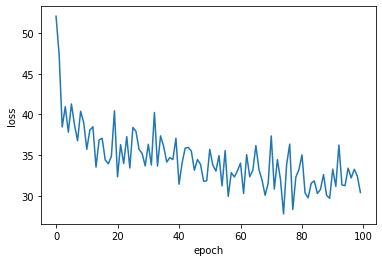

In [12]:
# 训练
import matplotlib.pyplot as plt
epoch_loss_list = []
for epoch in range(N_EPOCHS):
    epoch_loss = trainModel(epoch)
    epoch_loss_list.append(epoch_loss)
    print('epoch=', epoch, 'epoch_loss=', epoch_loss)
plt.plot(epoch_loss_list)
plt.ylabel('loss')
plt.xlabel('epoch')

# 测试
testModel()

- 理解pack_padded_sequence
    - [重要参考网址一](https://www.cnblogs.com/kykai/p/14033580.html)
    - [重要参考网址二](https://www.cnblogs.com/sbj123456789/p/9834018.html)

In [28]:
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.nn import utils as nn_utils
import torch.nn.functional as F
import torch

# seq example
# batch的尺寸是5，假设我们有五句话，每句话有不定长的词汇
# 这里只假设每个词汇的feature是一维的
batch_size = 5
a = torch.tensor([1, 2])
b = torch.tensor([1, 2, 3])
c = torch.tensor([1, 2, 3, 4])
d = torch.tensor([1])
e = torch.tensor([1, 2, 3, 4, 5, 6])

# general setting
# 提取五个句子的有效内容的长度
# 并且提取最大句子的长度
seq_lens = []
for i in [a, b, c, d, e]:
    seq_lens.append(len(i))
max_len = max(seq_lens)

# zero padding
# 通过加入0pad，让他们长度相等，这个长度是最长句子的长度
a = F.pad(a, (0, max_len-len(a)))
b = F.pad(b, (0, max_len-len(b)))
c = F.pad(c, (0, max_len-len(c)))
d = F.pad(d, (0, max_len-len(d)))
e = F.pad(e, (0, max_len-len(e)))
print('在句子经过pad填充以后：\n{}\n'.format(a))

# merge the seq
seq = torch.cat((a, b, c, d, e), 0).view(-1, max_len)
print('所有句子融合以后可以获得整个矩阵：\n{}\n'.format(seq))

# Pack
# 1. input size 可以是(TxBx*)=(最长序列长度T, batch_size B, 任意维度*)
# 2. input size 可以是(BxTx*)，如果batch_first=True
# 这里我们选择batch在前，所以是2
packed_seq = pack_padded_sequence(seq, seq_lens, batch_first=True, enforce_sorted=False)
print('经过了pack_padded_sequence处理\n{}\n'.format(packed_seq))

# Unpack
unpacked_seq, unpacked_lens = pad_packed_sequence(packed_seq, batch_first=True)
print('Unpack还原的结果：\n{}\n'.format(unpacked_seq))
print('同时返回seq的length：\n{}\n'.format(unpacked_lens))


在句子经过pad填充以后：
tensor([1, 2, 0, 0, 0, 0])

所有句子融合以后可以获得整个矩阵：
tensor([[1, 2, 0, 0, 0, 0],
        [1, 2, 3, 0, 0, 0],
        [1, 2, 3, 4, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [1, 2, 3, 4, 5, 6]])

经过了pack_padded_sequence处理
PackedSequence(data=tensor([1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 5, 6]), batch_sizes=tensor([5, 4, 3, 2, 1, 1]), sorted_indices=tensor([4, 2, 1, 0, 3]), unsorted_indices=tensor([3, 2, 1, 4, 0]))

Unpack还原的结果：
tensor([[1, 2, 0, 0, 0, 0],
        [1, 2, 3, 0, 0, 0],
        [1, 2, 3, 4, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [1, 2, 3, 4, 5, 6]])

同时返回seq的length：
tensor([2, 3, 4, 1, 6])



- exercise

- sentiment analysis on movie reviews

In [13]:
import pandas as pd
sentiment_train = pd.read_csv('./sentiment-analysis-on-movie-reviews/train.tsv', sep='\t')
sentiment_train

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


- 遗传算法
[参考网址](https://blog.csdn.net/weixin_58427214/article/details/125860212)

- 求解$x^3cos(x)(-1.57<=x<=20.18)$的最小值

In [ ]:
# 1. 计算所需二进制编码位数
# [start, end]为取值范围，precision为精度，即小数点后的位数
import math
def get_binary_bit(start, end, precision):
    numbers = (end-start)*pow(10, precision)+1  # 将区间划分为等距离的点
    if int(math.log(numbers, 2)) == math.log(numbers, 2):
        return int(math.log(numbers, 2))
    else:
        return int(math.log(numbers, 2))+1
    
    
# 2. 编码
# 将十进制数转化为对应的二进制数，decimal为未编码的十进制数
def binary_encode(decimal, start, end, precision):
    bit = get_binary_bit(start, end, precision)
    # 将十进制转换为对应的二进制编码
    binary = bin(int(decimal-start)*pow(10, precision))
    # 由于bin()生成的是0bxxxxxx的形式，因此切片
    binary = str(binary)[2:]
    # 补齐位数
    while len(binary) < bit:
        binary = '0'+binary
    # 返回二进制编码
    return binary


# 3. 解码
# 将二进制编码转换为对应的实际取值，binary为二进制编码
def binary_decode(binary, start, precision):
    # 将二进制编码转为标准形式0bxxxxxx
    binary = '0b'+binary
    # 将二进制编码转为十进制编码
    decimal = int(binary, 2)
    # 将十进制编码转为对应的十进制数
    decimal = start + decimal/pow(10, precision)
    return decimal

# 4. 随机生成初始种群
# population为种群大小
import random
def initialization(population, start, end, precision):
    initialized = []
    for i in range(population):
        # 随机生成指定范围和精度的小数，并转为二进制编码
        random_float = random.uniform(start, end)
        random_float_precision = round(random_float, precision)
        random_binary = binary_decode(random_float_precision, start, end, precision)
        initialized.append(random_binary)
    # 返回初始化种群
    return initialized

# 4. 随机初始初始种群（缩小随机取值的区间，加快算法的收敛）
# [optimize_start, optimize_end]为大致估计区间
def initialization(population, start, end, precision, optimize_start, optimize_end):
    initialized = []
    for i in range(population):
        random_float = random.uniform(optimize_start, optimize_end)
        random_float_precision = round(random_float, precision)
        random_binary = binary_encode(random_float_precision, start, end, precision)
        initialized.append(random_binary)
    return initialized
        
